# Diversification

Harold's company wants to build a diversified stock portfolio. So far, it has added `BMO` (Bank of Montreal) and `CNQ` (Canadian Natural Resources Limited), which reside within the Financial Services and Energy sectors in [the S&P TSX 60 index](https://en.wikipedia.org/wiki/S%26P/TSX_60), respectively. Now they want to add a third energy sector stock to the mix.

Harold's manager has asked him to research a set of five energy stocks to add to the existing portfolio. To create a diversified portfolio that tends to minimize long-term volatility/risk, stocks within the portfolio should be as uncorrelated as possible so as to create a counterbalance effect (i.e, when some stocks fall in price, others may rise in price).

Use the Pandas library to help Harold analyze five energy stocks—`CVE`, `ENB`, `IMO`, `IPL`, and `TRP`—and choose the stock with the least correlation to `BMO` and `CNQ`.

## Instructions

## Import libraries and dependencies

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns

%matplotlib inline

### Read CSV in as DataFrame

In [2]:
# Set file paths
BMO = (r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\02-Stu_Correlation\Resources\BMO.csv')
CNQ = (r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\02-Stu_Correlation\Resources\CNQ.csv')
CVE = (r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\02-Stu_Correlation\Resources\CVE.csv')
ENB = (r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\02-Stu_Correlation\Resources\ENB.csv')
IMO = (r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\02-Stu_Correlation\Resources\IMO.csv')
IPL = (r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\02-Stu_Correlation\Resources\IPL.csv')
TRP = (r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\02-Stu_Correlation\Resources\TRP.csv')

# Read the individual CSV datasets
bmo_df = pd.read_csv(BMO, infer_datetime_format=True, parse_dates=True, index_col='date')
cnq_df = pd.read_csv(CNQ, infer_datetime_format=True, parse_dates=True, index_col='date')
cve_df = pd.read_csv(CVE, infer_datetime_format=True, parse_dates=True, index_col='date')
enb_df = pd.read_csv(ENB, infer_datetime_format=True, parse_dates=True, index_col='date')
imo_df = pd.read_csv(IMO, infer_datetime_format=True, parse_dates=True, index_col='date')
ipl_df = pd.read_csv(IPL, infer_datetime_format=True, parse_dates=True, index_col='date')
trp_df = pd.read_csv(TRP, infer_datetime_format=True, parse_dates=True, index_col='date')

# Display sample data from `BMO` (all files have the same structure)
bmo_df.head()

,BMO
date,
2019-05-14,66.97
2019-05-13,66.49
2019-05-10,67.22
2019-05-09,66.04
2019-05-08,66.02


### Combine the DataFrames

In [3]:
# Use the `concat` function to combine the DataFrames by matching indexes (or in this case `date`)
combined_df = pd.concat([bmo_df, cnq_df, cve_df, enb_df, imo_df, ipl_df, trp_df], axis='columns', join='inner')
combined_df

,BMO,CNQ,CVE,ENB,IMO,IPL,TRP
date,,,,,,,
2019-05-14,66.9700,191.62,45.17,27.32,38.51,162.04,41.9700
2019-05-13,66.4900,190.34,44.76,26.24,37.38,158.45,40.9900
2019-05-10,67.2200,194.58,46.20,27.96,38.94,168.82,42.8300
2019-05-09,66.0400,194.58,46.62,27.21,39.27,170.19,43.2500
2019-05-08,66.0200,195.17,49.24,27.09,39.75,173.92,43.7000
...,...,...,...,...,...,...,...
2009-05-20,12.3299,23.83,15.58,4.50,4.80,9.73,10.4677
2009-05-19,12.3875,24.63,15.65,4.39,4.85,9.45,10.5871
2009-05-18,12.1925,26.02,15.52,4.14,4.68,9.27,10.4975


### Calculate Daily Returns

In [4]:
combined_df.dtypes

BMO    float64
CNQ    float64
CVE    float64
ENB    float64
IMO    float64
IPL    float64
TRP    float64
dtype: object

In [5]:
# Use the `pct_change` function to calculate daily returns for each stock
daily_returns = combined_df.pct_change()
daily_returns

,BMO,CNQ,CVE,ENB,IMO,IPL,TRP
date,,,,,,,
2019-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-13,-0.007167,-0.006680,-0.009077,-0.039531,-0.029343,-0.022155,-0.023350
2019-05-10,0.010979,0.022276,0.032172,0.065549,0.041734,0.065447,0.044889
2019-05-09,-0.017554,0.000000,0.009091,-0.026824,0.008475,0.008115,0.009806
2019-05-08,-0.000303,0.003032,0.056199,-0.004410,0.012223,0.021917,0.010405
...,...,...,...,...,...,...,...
2009-05-20,0.014214,0.041066,0.026350,0.036866,0.048035,0.006205,0.010571
2009-05-19,0.004672,0.033571,0.004493,-0.024444,0.010417,-0.028777,0.011407
2009-05-18,-0.015742,0.056435,-0.008307,-0.056948,-0.035052,-0.019048,-0.008463


### Calculate Correlation

In [6]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = daily_returns.corr()
correlation

,BMO,CNQ,CVE,ENB,IMO,IPL,TRP
BMO,1.000000,0.329386,0.318188,0.254498,0.337060,0.257717,0.317493
CNQ,0.329386,1.000000,0.429047,0.294653,0.375932,0.360918,0.393293
CVE,0.318188,0.429047,1.000000,0.385877,0.511066,0.483262,0.500741
ENB,0.254498,0.294653,0.385877,1.000000,0.438329,0.471212,0.352482
IMO,0.337060,0.375932,0.511066,0.438329,1.000000,0.517198,0.477247
IPL,0.257717,0.360918,0.483262,0.471212,0.517198,1.000000,0.472496
TRP,0.317493,0.393293,0.500741,0.352482,0.477247,0.472496,1.000000


### Plot Correlation

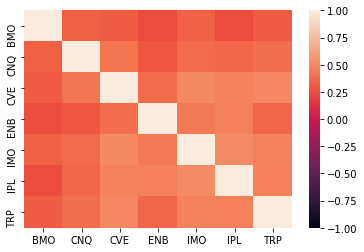

In [7]:
# Create a heatmap from the correlation values
sns.heatmap(correlation, vmin=-1, vmax=1)

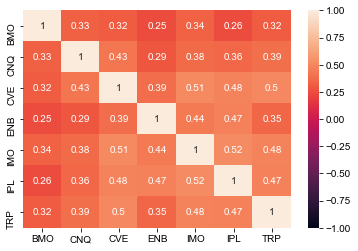

In [8]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
sns.set(rc={'figure.figsize':(15,10)})

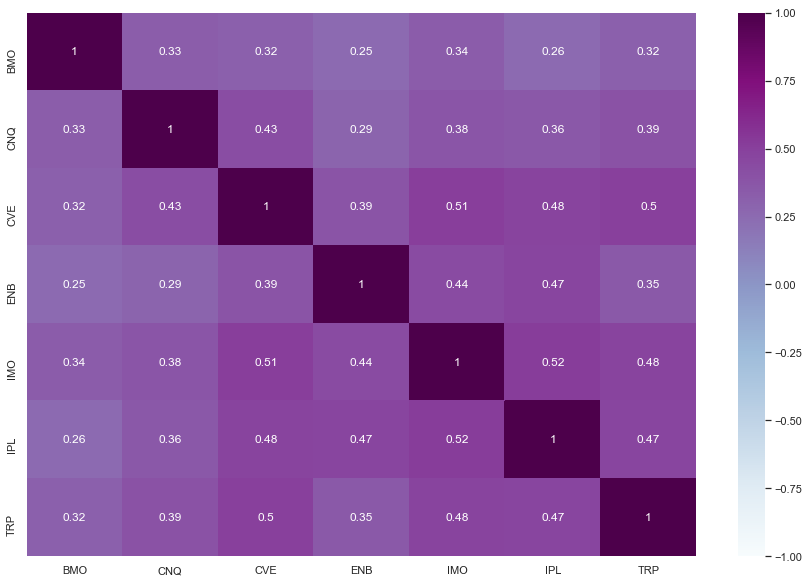

In [10]:
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap='BuPu')
sns.set(rc={'figure.figsize':(15,10)})

### Which energy stock would be the best candidate to add to the existing portfolio?

**ENB**